In [4]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')




In [5]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

In [6]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
import seaborn as sns

In [8]:
hotel.head(4).T

,0,1,2,3
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0
lead_time,342,737,7,13
arrival_date_year,2015,2015,2015,2015
arrival_date_month,July,July,July,July
arrival_date_week_number,27,27,27,27
arrival_date_day_of_month,1,1,1,1
stays_in_weekend_nights,0,0,0,0
stays_in_week_nights,0,0,1,1
adults,2,2,1,1


In [9]:
tmp = hotel.isnull().sum().reset_index(name='missing_val')
tmp[tmp['missing_val']!= 0]

,index,missing_val
10,children,4
13,country,488
23,agent,16340
24,company,112593


In [10]:
hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
hotel['is_canceled']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [12]:
copy=hotel.copy()

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [14]:
copy['cancel']= label_encoder.fit_transform(copy['is_canceled'])

## Pairplot

In [20]:
num_to_cancel_state = {0: "canceled", 1: "not canceled"}
num_classes = len(num_to_cancel_state)

df_corr = copy.corr().cancel[:-1]
indices = df_corr.abs().sort_values(ascending=False).index[:6]
indices = indices.append(pd.Index(['cancel']))

copy.cancel.astype(object, copy=False)
copy.cancel.replace(num_to_cancel_state, inplace=True)

g = sns.pairplot(
    copy[indices],
    hue="cancel",
    hue_order=num_to_cancel_state.values(),
    palette=["green", "red"]
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=10)
    ax.set_ylabel(ax.get_ylabel(), rotation=80)
    ax.yaxis.get_label().set_horizontalalignment('right')

AttributeError: ignored

In [21]:
X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [22]:
X_train.shape, X_valid.shape

((89542, 63), (29848, 63))

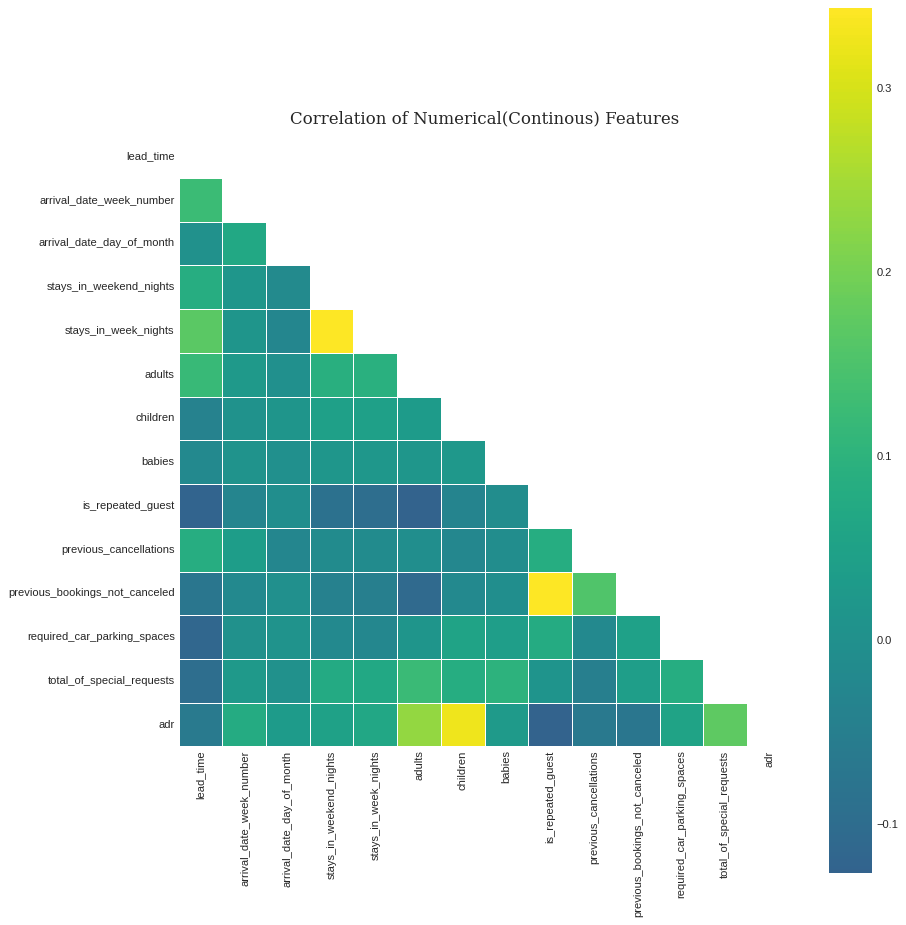

In [23]:
import numpy as np
#Taking all columns except URL 
corr = hotel[features_num].corr()

fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='viridis', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Numerical(Continous) Features', fontsize=15,font="Serif")
plt.show()

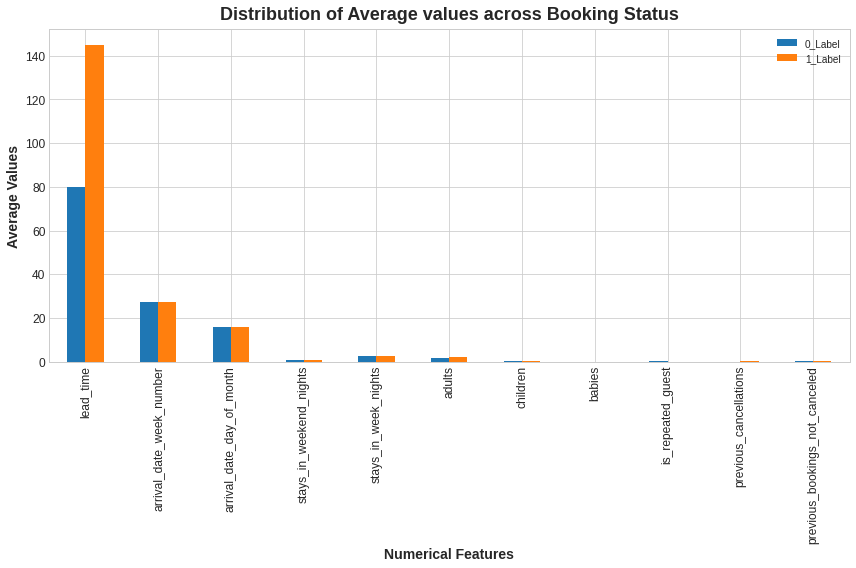

In [24]:
df_distr =hotel.groupby('is_canceled')[features_num].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Booking Status", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


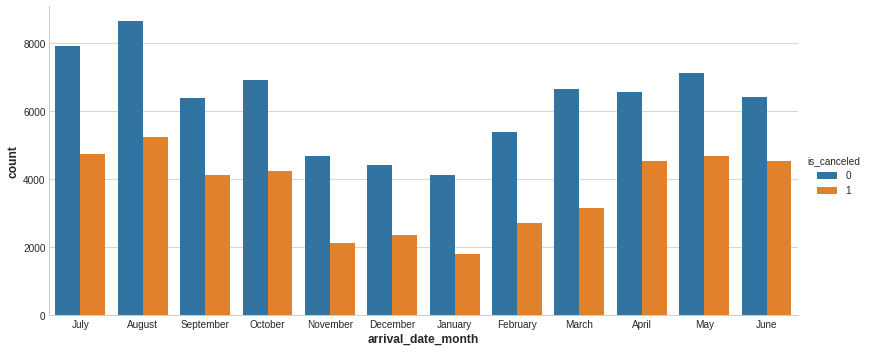

In [25]:
sns.catplot("arrival_date_month", hue="is_canceled", data=hotel, kind="count",height=5.0, aspect=18.7/8.27 )

In [26]:
import plotly.express as px
fig=px.bar(hotel, x='arrival_date_month', color='is_canceled')
fig.show()

#Classification via Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
lr = LogisticRegression(max_iter=1000)

In [29]:
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr.predict(X_valid)

In [30]:
accuracy = lr.score(X_valid, y_valid)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.807


In [41]:
from sklearn.metrics import (
    precision_recall_fscore_support,
    accuracy_score
)

def evaluate_metrics(y_true, y_pred):
    results_pos = dict()
    results_pos['accuracy'] = accuracy_score(y_true, y_pred)
    precision, recall, f_beta, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1_score'] = f_beta
    
    return results_pos

In [42]:
evaluate_metrics(y_valid, y_pred)

{'accuracy': 0.8066872152238006,
 'recall': 0.7571144447340032,
 'precision': 0.8267898466727497,
 'f1_score': 0.7725320752658166}

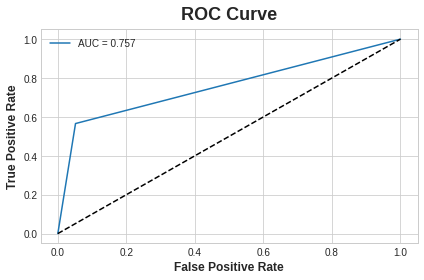

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate (FPR), true positive rate (TPR), and classification threshold for various thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

# Compute the AUC score
auc_score = roc_auc_score(y_valid, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>

Binary Cross Entrophy

In [35]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train,y_train, epochs=25, verbose=0)

# Make predictions on the validation data
y_pred = (model.predict(X_valid) > 0.5).astype("int32")

# Evaluate the performance of the model using accuracy as the metric
accuracy = model.evaluate(X_valid, y_valid)[1]
print(f"Accuracy: {accuracy:.3f}")


933/933 [==============================] - 2s 2ms/step - loss: 0.4364 - accuracy: 0.8067
Accuracy: 0.807


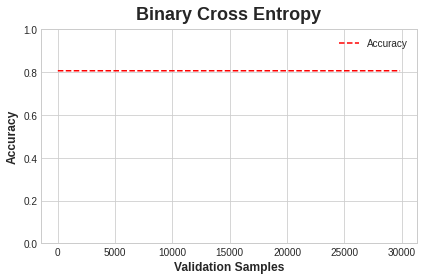

In [36]:
plt.plot([accuracy]*len(y_valid), 'r--', label='Accuracy')
plt.legend()
plt.ylim([0.0, 1.0])
plt.title('Binary Cross Entropy')
plt.xlabel('Validation Samples')
plt.ylabel('Accuracy')
plt.show()

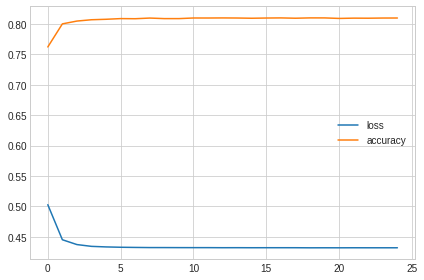

In [37]:
pd.DataFrame(history.history).plot();

## With cross validation

Epoch 1/25
2799/2799 [==============================] - 10s 4ms/step - loss: 0.4320 - accuracy: 0.8097 - val_loss: 0.4362 - val_accuracy: 0.8071
Epoch 2/25
2799/2799 [==============================] - 9s 3ms/step - loss: 0.4319 - accuracy: 0.8094 - val_loss: 0.4363 - val_accuracy: 0.8079
Epoch 3/25
2799/2799 [==============================] - 10s 4ms/step - loss: 0.4319 - accuracy: 0.8094 - val_loss: 0.4364 - val_accuracy: 0.8077
Epoch 4/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.4319 - accuracy: 0.8096 - val_loss: 0.4360 - val_accuracy: 0.8081
Epoch 5/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.4319 - accuracy: 0.8101 - val_loss: 0.4360 - val_accuracy: 0.8068
Epoch 6/25
2799/2799 [==============================] - 10s 3ms/step - loss: 0.4319 - accuracy: 0.8094 - val_loss: 0.4362 - val_accuracy: 0.8073
Epoch 7/25
2799/2799 [==============================] - 10s 3ms/step - loss: 0.4319 - accuracy: 0.8095 - val_loss: 0.4358 - val_acc

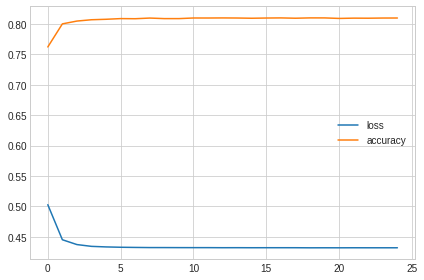

In [39]:
history1 = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25)
pd.DataFrame(history1.history).plot();

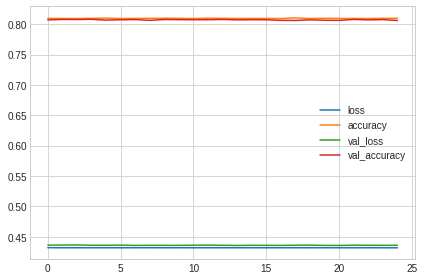

In [40]:
pd.DataFrame(history1.history).plot();

## Adding more layers

Epoch 1/25
2799/2799 [==============================] - 12s 4ms/step - loss: 0.4179 - accuracy: 0.8053 - val_loss: 0.4027 - val_accuracy: 0.8116
Epoch 2/25
2799/2799 [==============================] - 12s 4ms/step - loss: 0.3882 - accuracy: 0.8188 - val_loss: 0.3854 - val_accuracy: 0.8210
Epoch 3/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.3781 - accuracy: 0.8238 - val_loss: 0.3802 - val_accuracy: 0.8249
Epoch 4/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.3703 - accuracy: 0.8296 - val_loss: 0.3804 - val_accuracy: 0.8245
Epoch 5/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.3658 - accuracy: 0.8312 - val_loss: 0.3736 - val_accuracy: 0.8280
Epoch 6/25
2799/2799 [==============================] - 11s 4ms/step - loss: 0.3609 - accuracy: 0.8347 - val_loss: 0.3711 - val_accuracy: 0.8303
Epoch 7/25
2799/2799 [==============================] - 13s 5ms/step - loss: 0.3567 - accuracy: 0.8376 - val_loss: 0.3695 - val_ac

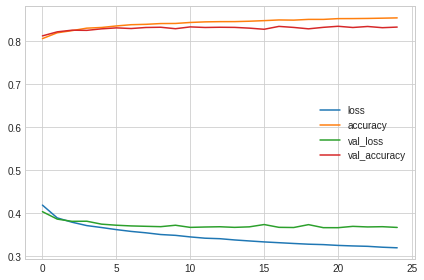

In [47]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25)
pd.DataFrame(history2.history).plot();



In [55]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                4096      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________


In [48]:
accuracy = model1.evaluate(X_valid, y_valid)[1]
print(f"Accuracy: {accuracy:.3f}")

933/933 [==============================] - 4s 4ms/step - loss: 0.3660 - accuracy: 0.8321
Accuracy: 0.832


In [87]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history4 = model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25, verbose=0)
pd.DataFrame(history4.history).plot();

ValueError: ignored